In [1]:
import torch
from model import Encoder


n_layers = 6
width = 384
n_heads = 6

model = Encoder(8192, width, n_layers, n_heads, width * 2, 0.1, torch.device("cpu"), 1024,"learned")


In [12]:
model.load_state_dict(torch.load("results_absolute/xsmall_noaug_learned_50k.pt", map_location='cpu'))

<All keys matched successfully>

In [3]:
import numpy as np

In [4]:
model.pos_embedding.embedding.weight.shape

torch.Size([1024, 384])

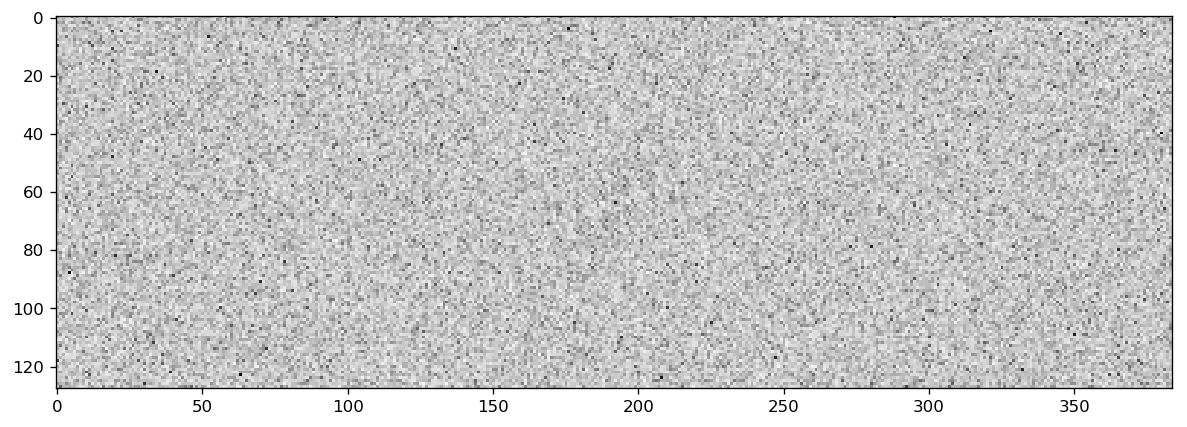

In [10]:
%matplotlib inline
from matplotlib import pyplot as plt

plt.figure(figsize=(12, 8), dpi=120)
plt.imshow(np.log(abs(np.fft.fftshift(np.fft.fft2(model.pos_embedding.embedding.weight.detach().numpy()[:128])))), cmap='gray')

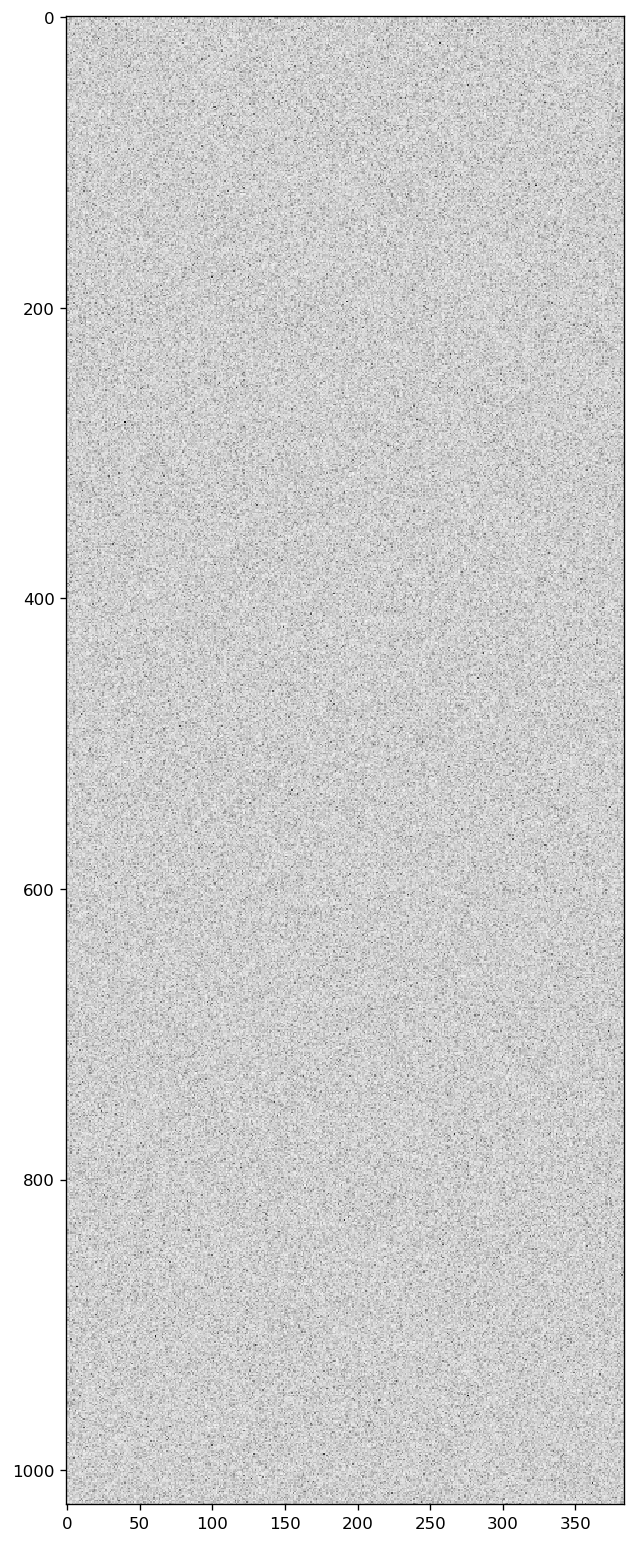

In [40]:
plt.figure(figsize=(6, 24), dpi=120)
plt.imshow(np.log(abs(np.fft.fftshift(np.fft.fft2(model.pos_embedding.embedding.weight.detach().numpy())))), cmap='gray')

In [13]:
embeddings = model.pos_embedding.embedding.weight.detach()

In [14]:
normed_embeddings = embeddings / embeddings.norm(dim=-1, keepdim=True)

In [15]:
normed_embeddings = normed_embeddings.cpu().numpy()

In [8]:
similarityaug = normed_embeddings @ normed_embeddings.T

In [16]:
similarity = normed_embeddings @ normed_embeddings.T


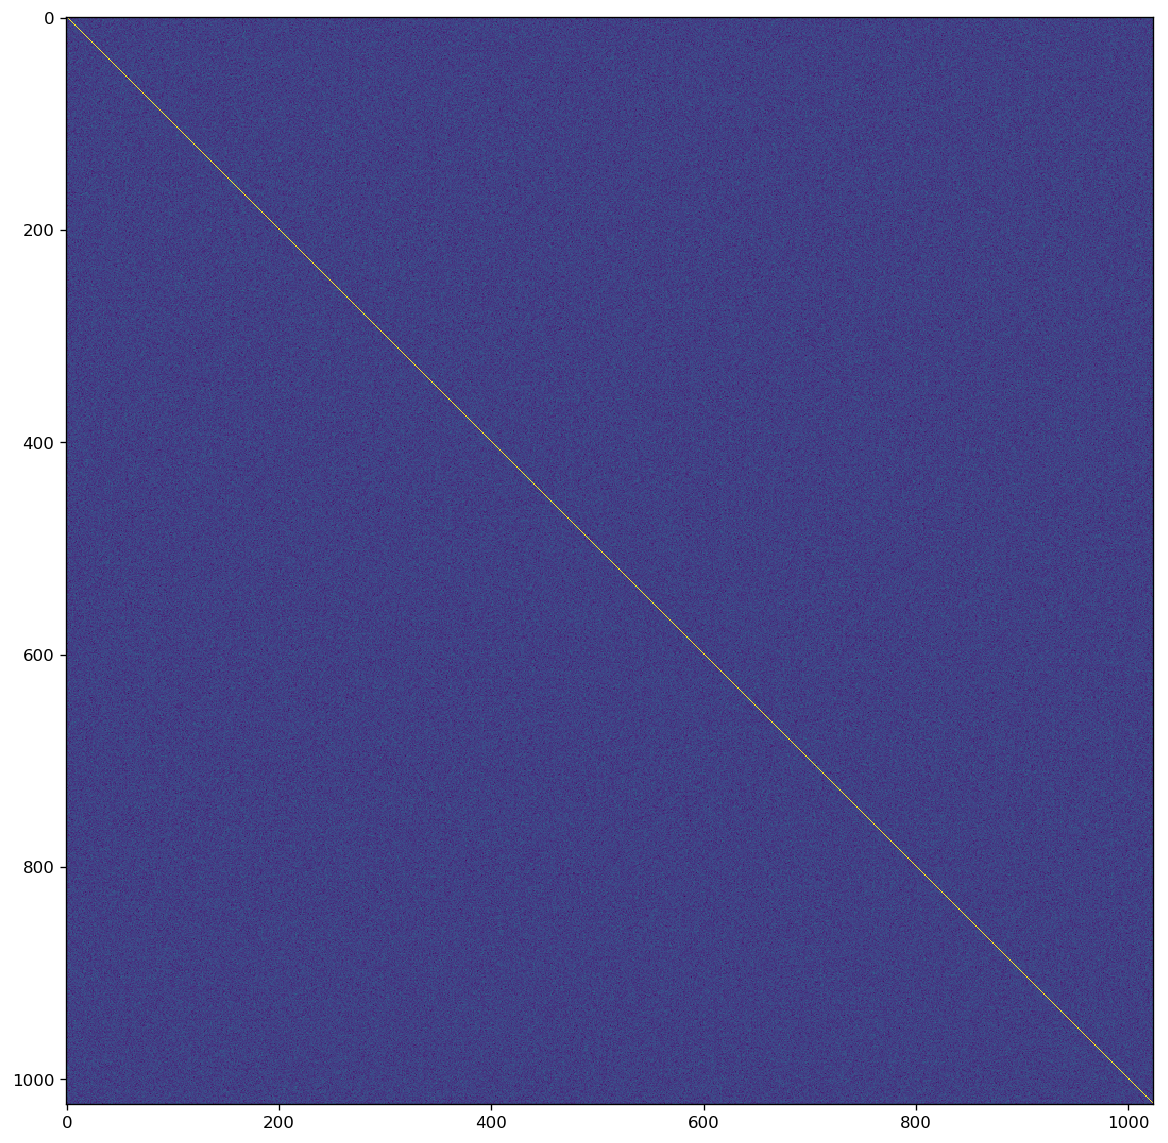

In [17]:
plt.figure(figsize=(12, 12), dpi=120)

plt.imshow(similarity)

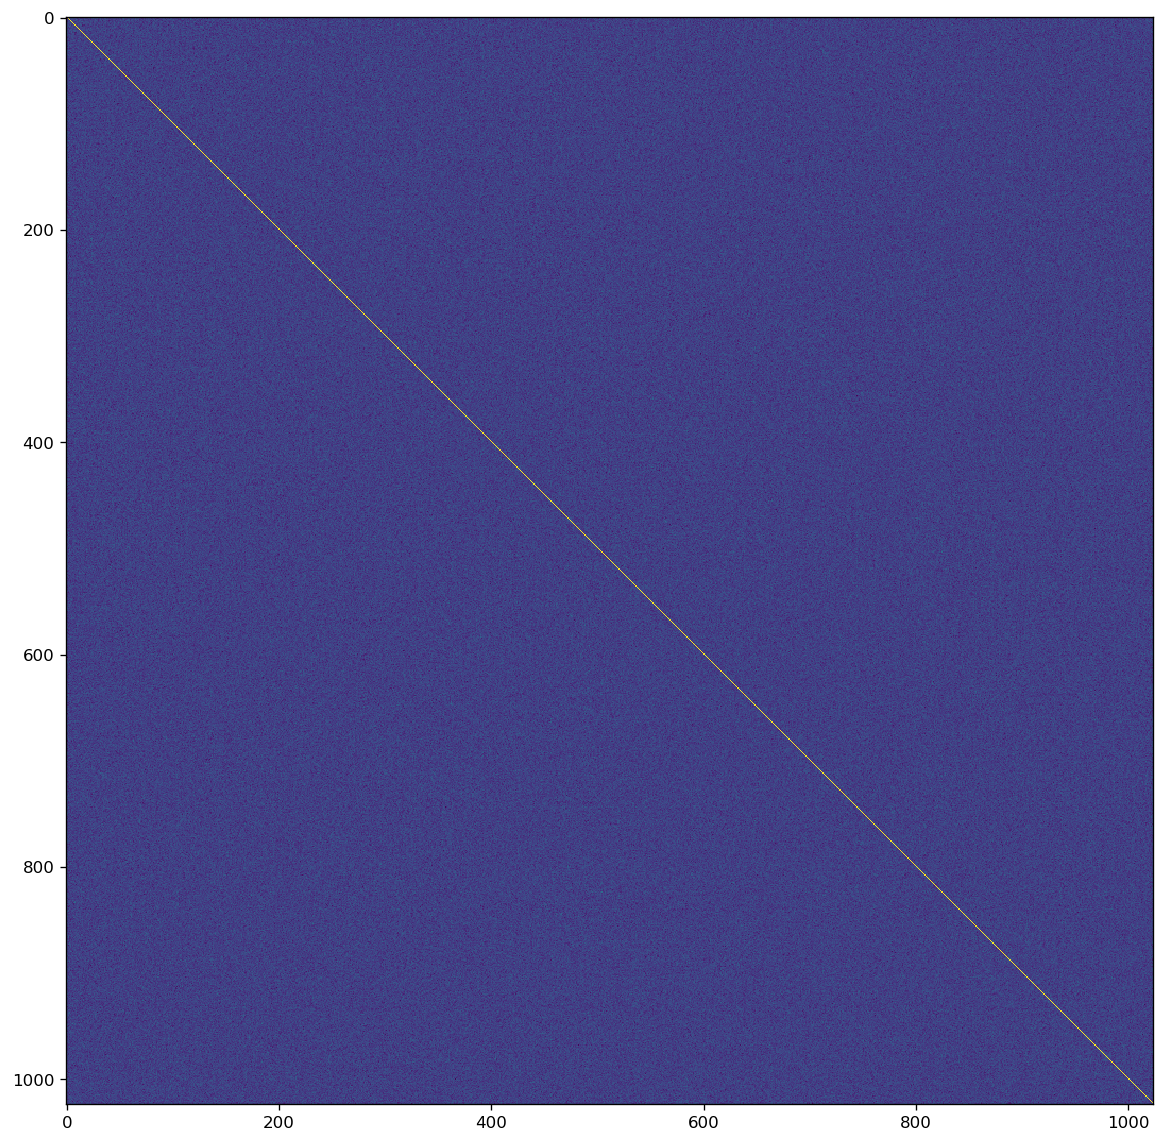

In [11]:
plt.figure(figsize=(12, 12), dpi=120)

plt.imshow(similarityaug)

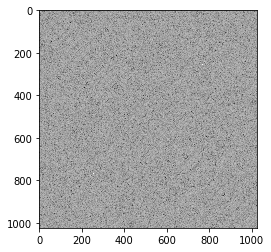

In [18]:
plt.imshow(np.log(abs(np.fft.fftshift(np.fft.fft2(similarity)))), cmap='gray')

c:\users\eric\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


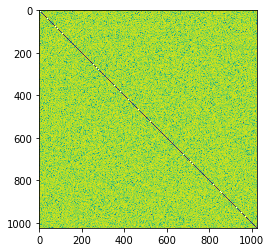

In [19]:
plt.imshow(np.log(abs(similarity-similarityaug)))

In [63]:
model2 = Encoder(8192, width, n_layers, n_heads, width * 2, 0.1, torch.device("cpu"), 1024,"sinusoidal")

model2.load_state_dict(torch.load("results_absolute/result_xsmall_noaug_sinusoidal1.pt", map_location='cpu'))

<All keys matched successfully>

In [64]:
embeddings2 = model2.pos_embedding.embedding.weight.detach()
normed_embeddings2 = embeddings2 / embeddings2.norm(dim=-1, keepdim=True)
normed_embeddings2 = normed_embeddings2.cpu().numpy()
similarityaug2 = normed_embeddings2 @ normed_embeddings2.T
similarity2 = normed_embeddings2 @ normed_embeddings2.T

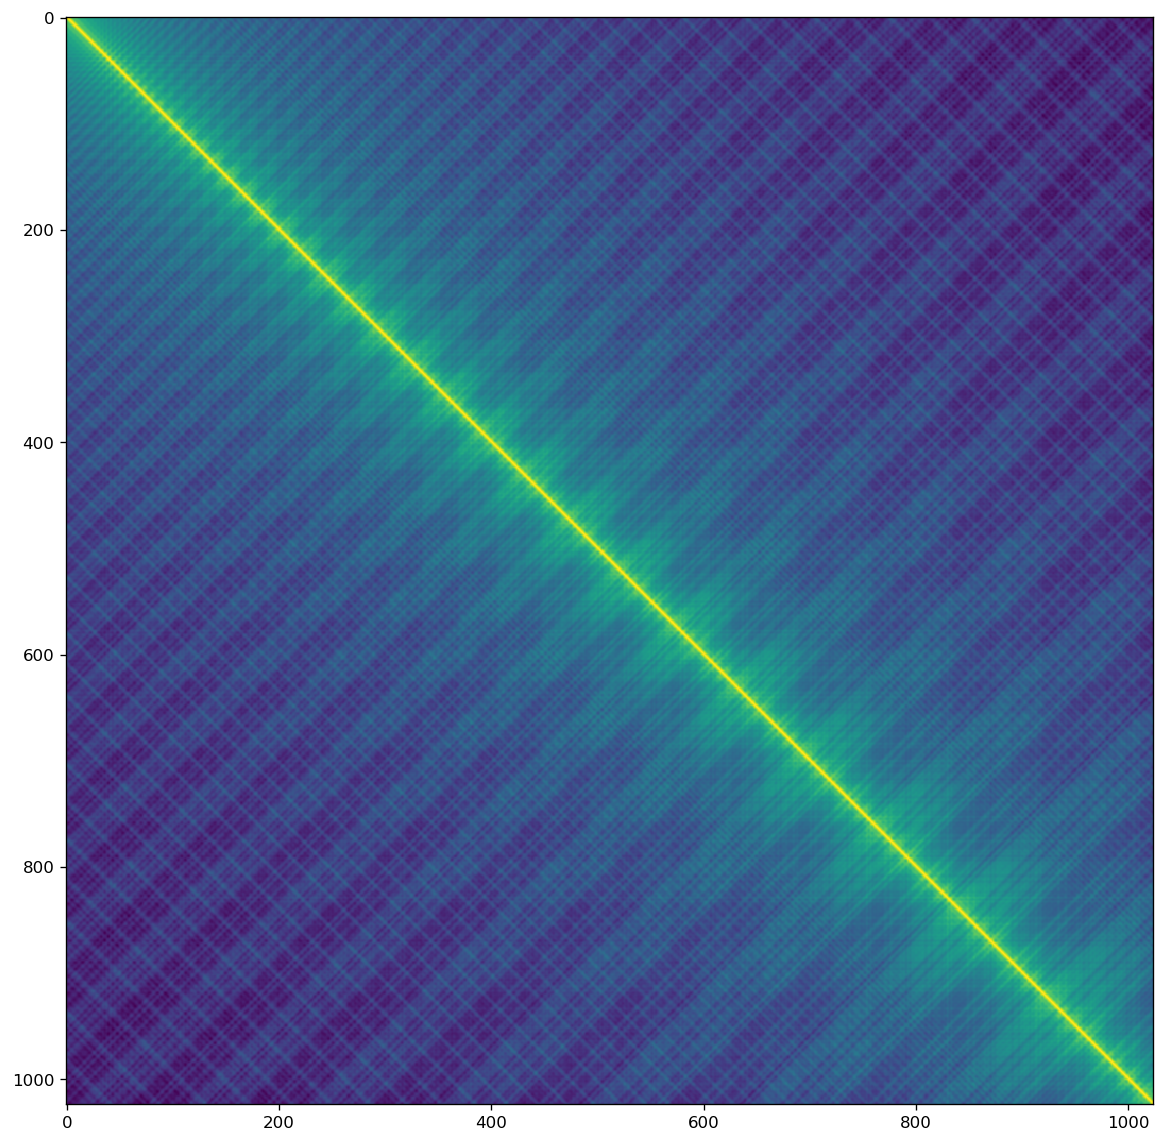

In [65]:
plt.figure(figsize=(12, 12), dpi=120)

plt.imshow(similarity2)